In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to build the model
from sklearn.linear_model import LogisticRegression

# to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score
from math import sqrt

# visualise learning algorithm
#from yellowbrick.classifier.rocauc import roc_auc
#from yellowbrick.classifier import ConfusionMatrix

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

#from yellowbrick.datasets import load_credit

In [2]:
# load the train and test set with the engineered variables

# we built and saved these datasets in a previous notebook.
# If you haven't done so, go ahead and check the previous notebooks (step 2)
# to find out how to create these datasets

x_train = pd.read_csv('xtrain.csv')
x_test = pd.read_csv('xtest.csv')

x_train.head()

,education-num,capital-gain,capital-loss,hours-per-week,class_idx,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_Rare,workclass_missing,education_ 10th,education_ 11th,education_ 12th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Prof-school,education_ Some-college,education_Rare,marital-status_ Divorced,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,marital-status_Rare,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Rare,occupation_missing,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ White,race_Rare,sex_ Female,sex_ Male,native-country_ Mexico,native-country_ United-States,native-country_Rare,native-country_missing,age_group_25-30,age_group_30-35,age_group_35-45,age_group_45-60,age_group_<=25,age_group_<=70,age_group_>70,edu_group_<=12.5,edu_group_<=14.5,edu_group_<=8.5,edu_group_>14.5
0,10,0.0,0.0,0.346939,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,9,0.0,0.0,0.397959,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
2,6,0.0,0.0,1.000000,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,13,0.0,0.0,0.448980,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,13,0.0,0.0,0.244898,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


In [3]:
# capture target variable
y_train=x_train['class_idx']
y_test=x_test['class_idx']

In [4]:
# load the pre-selected feature
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list() 
features


['capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Self-emp-not-inc',
 'education_ 7th-8th',
 'marital-status_ Divorced',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Other-service',
 'relationship_ Other-relative',
 'relationship_ Own-child',
 'relationship_ Wife',
 'race_Rare',
 'sex_ Female',
 'native-country_ Mexico',
 'age_group_<=25',
 'edu_group_<=8.5']

In [5]:
# reduce the train and test set with selected features
x_train=x_train[features]
x_test=x_test[features]

### logistic regression model 

In [6]:
# set up the model
model=LogisticRegression(penalty='l2',random_state=0,C=.05,)

# train the model
model.fit(x_train,y_train)

LogisticRegression(C=0.05, random_state=0)

#### make predictions and evaluate model performance

In [12]:
# make predictions for test set
class_ = model.predict(x_train)
pred = model.predict_proba(x_train)[:,1]

# determine mse and rmse
print('train roc-auc: {}'.format(roc_auc_score(y_train, pred)))
print('train f1_score: {}'.format(f1_score(y_train, class_)))
print()

# make predictions for test set
class_ = model.predict(x_test)
pred = model.predict_proba(x_test)[:,1]

# determine mse and rmse
print('test roc-auc: {}'.format(roc_auc_score(y_test, pred)))
print('test f1_score: {}'.format(f1_score(y_test, class_)))
print()

train roc-auc: 0.8747128171363516
train f1_score: 0.8884256929969573

test roc-auc: 0.8653019309341532
test f1_score: 0.884666793966011



In [8]:
pred

array([0.9941071 , 0.55769535, 0.78207651, ..., 0.40169779, 0.96028766,
       0.48886167])

In [11]:
resu=[]
resu[0]=pred

IndexError: list assignment index out of range

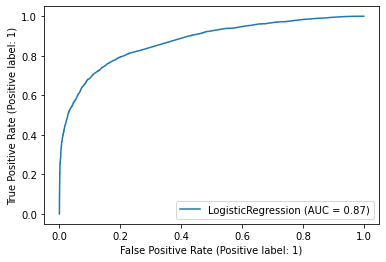

In [8]:
metrics.plot_roc_curve(model, x_train, y_train)  

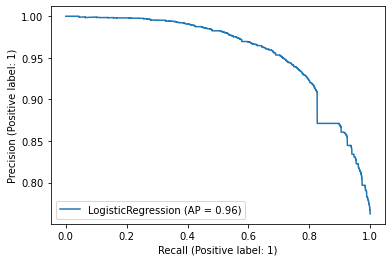

In [9]:
metrics.plot_precision_recall_curve(model, x_train, y_train)  

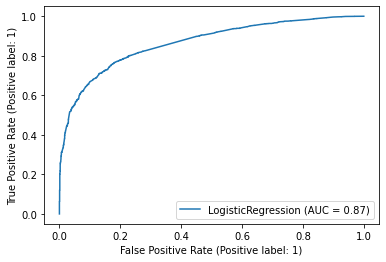

In [10]:
metrics.plot_roc_curve(model, x_test, y_test)  

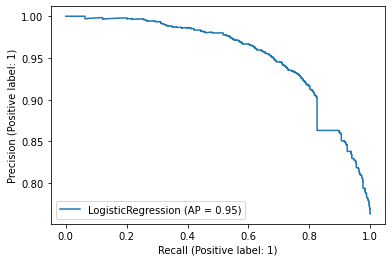

In [11]:
metrics.plot_precision_recall_curve(model, x_test, y_test)  

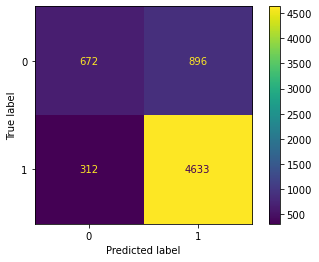

In [12]:
 metrics.plot_confusion_matrix(model, x_test, y_test) 

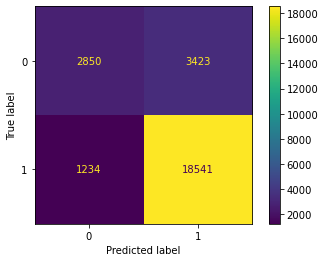

In [13]:
 metrics.plot_confusion_matrix(model, x_train, y_train) 